## (1) 데이터 가져오기

- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
- [여기](https://www.kaggle.com/c/bike-sharing-demand/data)에서 데이터를 상세히 확인할 수 있습니다.

In [149]:
import pandas as pd

train_df = pd.read_csv("../bike_regression/data/bike-sharing-demand/train.csv")
test_df = pd.read_csv("../bike_regression/data/bike-sharing-demand/test.csv")

In [150]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


## (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

- to_datetime 활용 : [링크](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html#pandas.to_datetime) 참조
- pandas datetime extract year month day 키워드로 검색해 보기

In [151]:
datetime = pd.to_datetime(train_df["datetime"])

train_df["datetime_year"] = datetime.dt.year
train_df["datetime_month"] = datetime.dt.month
train_df["datetime_hour"] = datetime.dt.hour
train_df["datetime_minute"] = datetime.dt.minute
train_df["datetime_second"] = datetime.dt.second

datetime = pd.to_datetime(test_df["datetime"])

test_df["datetime_year"] = datetime.dt.year
test_df["datetime_month"] = datetime.dt.month
test_df["datetime_hour"] = datetime.dt.hour
test_df["datetime_minute"] = datetime.dt.minute
test_df["datetime_second"] = datetime.dt.second

In [152]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'datetime_year', 'datetime_month', 'datetime_hour', 'datetime_minute',
       'datetime_second'],
      dtype='object')

## (3) year, month, day, hour, minute, second 데이터 개수 시각화하기

- sns.countplot 활용해서 시각화하기
- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

<AxesSubplot:xlabel='datetime_second', ylabel='count'>

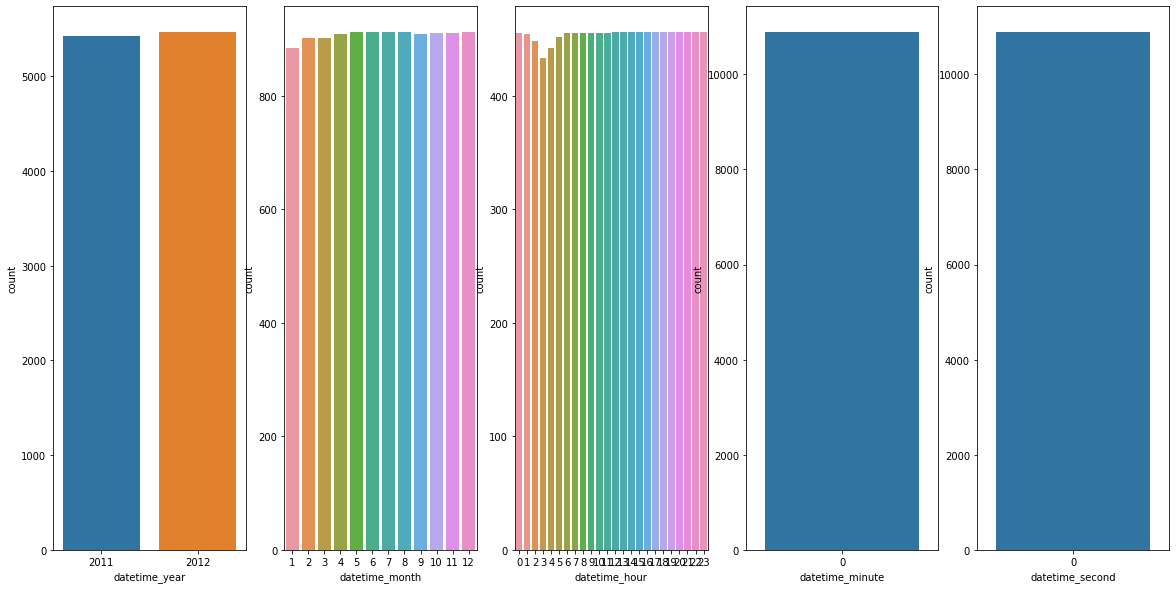

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

"""
훈련 데이터:
데이터가 고른 분포를 가지는 것을 확인할 수 있다.
"""
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 10))

sns.countplot(x="datetime_year", data=train_df, ax=axes[0])
sns.countplot(x="datetime_month", data=train_df, ax=axes[1])
sns.countplot(x="datetime_hour", data=train_df, ax=axes[2])
sns.countplot(x="datetime_minute", data=train_df, ax=axes[3])
sns.countplot(x="datetime_second", data=train_df, ax=axes[4])

## (4) X, y 컬럼 선택 및 train/test 데이터 분리

- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기

<AxesSubplot:>

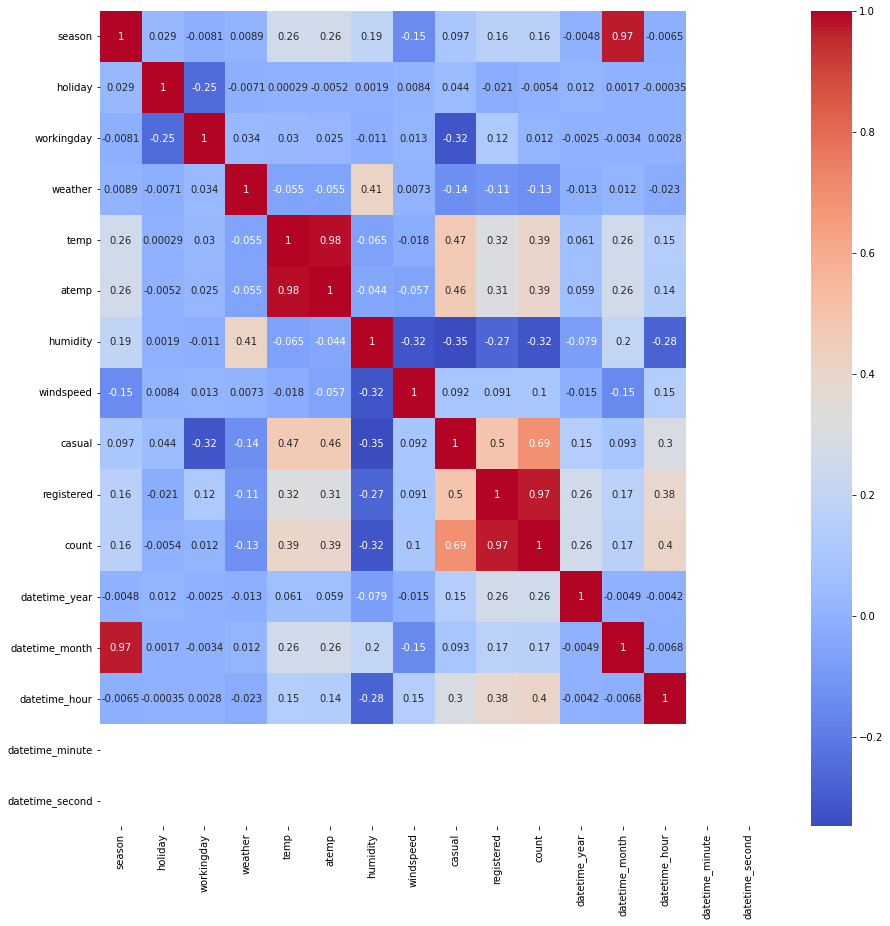

In [154]:
plt.figure(figsize=(15, 15))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm")

In [155]:
X_columns = [
    # 시간 데이터
    "datetime_year",
    "datetime_month",
    "datetime_hour",
#     "datetime_minute", # 시간 당 데이터이기 때문에 사용 X
#     "datetime_second", # 시간 당 데이터이기 때문에 사용 X
#     "season",
    "holiday",
    "workingday",
    
    # 날씨 데이터
    "weather",
    "temp",
#     "atemp", # 온도와 체감 온도는 상관관계가 강해서 삭제한다.
    "humidity",
    "windspeed"
]
y_column = "count"

X_train = train_df[X_columns]
y_train = train_df[y_column]
X_test = test_df[X_columns]

## (5) LinearRegression 모델 학습

- sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [156]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

- 학습된 모델에 X_test를 입력해서 예측값 출력하기
- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
- mse 값과 함께 rmse 값도 계산하기

In [157]:
import numpy as np
from sklearn.metrics import mean_squared_error

def root_mean_squared_error(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [158]:
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred)
rmse = root_mean_squared_error(y_train, y_pred)

print(f"MSE: {mse}, RMSE: {rmse}")

MSE: 20089.277530353444, RMSE: 141.7366485082579


## (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기

- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

(0.0, 1000.0)

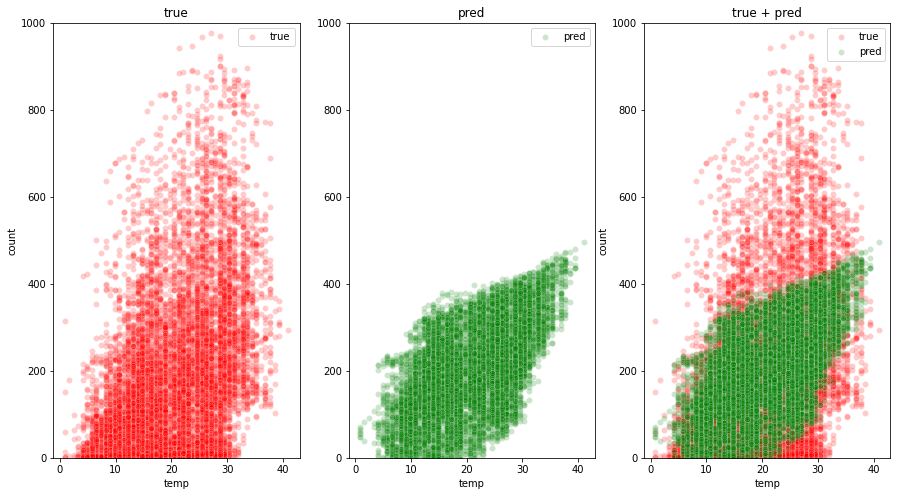

In [167]:
"""
- 자전거 대여가 매우 많은 건에 대해서는 예측이 좋지 않다.
- 20~30도 구간에서 자전거 대여가 매우 적은 건에 대해서도 예측이 좋지 않다.
"""
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

ax = sns.scatterplot(x=X_train["temp"], y=y_train, color="r", alpha=0.2, label="true", ax=axes[0])
ax.set_title("true")
ax.set_ylim((0, 1_000))

ax = sns.scatterplot(x=X_train["temp"], y=y_pred, color="g", alpha=0.2, label="pred", ax=axes[1])
ax.set_title("pred")
ax.set_ylim((0, 1_000))

sns.scatterplot(x=X_train["temp"], y=y_train, color="r", alpha=0.2, label="true", ax=axes[2])
ax = sns.scatterplot(x=X_train["temp"], y=y_pred, color="g", alpha=0.2, label="pred", ax=axes[2])
ax.set_title("true + pred")
ax.set_ylim((0, 1_000))

(0.0, 1000.0)

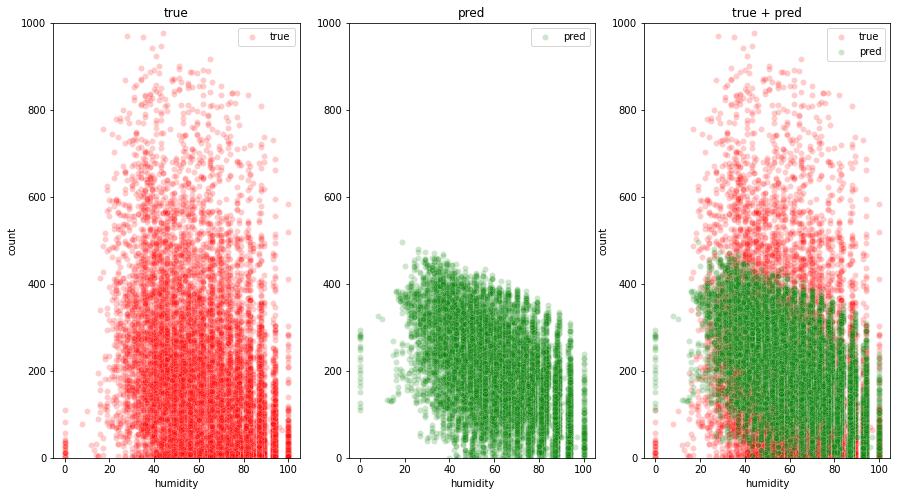

In [168]:
"""
- 자전거 대여가 매우 많은 건에 대해서는 예측이 좋지 않다.
- 습도가 0일 때는 실제 값과 예측 값이 전혀 다른 양상을 보이고 있다.
  - 습도가 0인 것은 아마 결측치로 생각되는데, 이에 대한 처리를 따로 하지 않아서 그런 것 같다.
"""
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

ax = sns.scatterplot(x=X_train["humidity"], y=y_train, color="r", alpha=0.2, label="true", ax=axes[0])
ax.set_title("true")
ax.set_ylim((0, 1_000))

ax = sns.scatterplot(x=X_train["humidity"], y=y_pred, color="g", alpha=0.2, label="pred", ax=axes[1])
ax.set_title("pred")
ax.set_ylim((0, 1_000))

sns.scatterplot(x=X_train["humidity"], y=y_train, color="r", alpha=0.2, label="true", ax=axes[2])
ax = sns.scatterplot(x=X_train["humidity"], y=y_pred, color="g", alpha=0.2, label="pred", ax=axes[2])
ax.set_title("true + pred")
ax.set_ylim((0, 1_000))